# Análise grupo Telegram: USP_Python

O objetivo desse trabalho é utilizar técnicas de NLP (nuvem de palarvas, extração de sentimentos, extração de tópicos etc), montando um código em Python comentado e explicado.  



O primeiro passo é fazer a extração das mensagens do grupo de dentro do Telegram. Para isso é necessário baixar o aplicativo do <a href="https://desktop.telegram.org/">Telegram para Desktop</a>. E seguir <a href ="https://www.youtube.com/watch?v=8Jpxdg86dmc">esse</a> passo a passo de como fazer a extração de todas as mensagens, fotos e documentos. Na hora de escolher o formato de dado a ser baixado é necessário escolher o formato .JSON

Segue um resumo básico das bibliotecas em Python que vamos utilizar para fazer nossa análise:

* Pandas: Utilizado para manipulação e análise de dados, convertendo os dados para a estrutura de Dataframes. 
* Numpy: Utilizado para manipulação de dados, e operações matemáticas.
* Json: Utilizado para ler aquivos .json 
* Nltk: Utilizado para aplicar técnias de NLP em nossos dados. 
* Matplotlib: Utilizado para printar gráficos e imagens. 
* [OUTRAS BIBLIOTECAS VÃO SER ADICIONADAS]

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import json
import nltk
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Configurando a biblioteca pandas para mostrar todos os dados dentro do nosso Dataframe
pd.set_option("display.max_rows", 9999)
pd.set_option("display.max_columns", 99)

In [2]:
# Abrindo o arquivo result.json que contem todas as mensagem extraidas do grupo
f = open("data/result.json", encoding="utf8")

# Carregando as mensagens do result.json
data = json.load(f)

# Carregando os campos importantes para construção do nosso Dataframe
msgs = data["messages"]

# Printando a estrutura de dados que contem informações sobre as mensagens do grupo
msgs

In [3]:
# Formatando e limpando a coluna "text" para remover textos desnecessários para análise
remove_strings = ["[", "]", "{", "}", "'type':", "'mention',", "'link',", "'text':", "'user_id':"]

for msg in msgs:
    for string in remove_strings:
        msg["text"] = str(msg["text"]).replace(string, "")

Aqui vamos constuir o Dataframe contento toda a informação extraida do grupo. Nesse momento nossos campos mais importantes são: "from" que representa de quem é a mensagem, e "text" que é a própria mensagem. 

In [4]:
# Construindo o Dataframe a partir da variavél msgs que foi formatada
df = pd.DataFrame(msgs)

# Printando o Dataframe
df

,id,type,date,actor,actor_id,action,title,text,from,from_id,...,height,members,reply_to_message_id,file,thumbnail,mime_type,edited,poll,message_id,forwarded_from
0,1,service,2021-09-01T14:20:03,USP - Python,channel1551445997,migrate_from_group,USP - Python,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,message,2021-09-01T14:20:32,NaN,NaN,NaN,NaN,Olá,Ronnan,user1034031624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,message,2021-09-01T14:21:03,NaN,NaN,NaN,NaN,O/,Ronnan,user1034031624,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,message,2021-09-01T14:21:04,NaN,NaN,NaN,NaN,,Ronnan,user1034031624,...,960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,message,2021-09-01T14:21:10,NaN,NaN,NaN,NaN,:-),Maria Silva,user872502354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,1907,message,2021-09-09T17:00:05,NaN,NaN,NaN,NaN,"'www.dsa.academy.com', ' excelente curso e ...",Silvio,user1984076730,...,NaN,NaN,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1895,1908,message,2021-09-09T17:01:23,NaN,NaN,NaN,NaN,'www.datascienceacademy.com.br',Paulo Lima,user788109664,...,NaN,NaN,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1896,1909,message,2021-09-09T17:02:24,NaN,NaN,NaN,NaN,Acho que o link tá quebrado,Paulo Lima,user788109664,...,NaN,NaN,1907.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1897,1910,message,2021-09-09T17:03:00,NaN,NaN,NaN,NaN,Desculpa o que o Paulo Lima mandou está correto 👍,Silvio,user1984076730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com o Pandas podemos acessar os atributos .shape e .columns, assim podemos verificar as dimensões e colunas do Dataframe. São 1899 registros e 22 colunas. 

In [5]:
# Estrutura do Dataframe
df.shape

(1899, 22)

In [6]:
# Nome de todas as colunas do Dataframe
df.columns

Index(['id', 'type', 'date', 'actor', 'actor_id', 'action', 'title', 'text',
       'from', 'from_id', 'photo', 'width', 'height', 'members',
       'reply_to_message_id', 'file', 'thumbnail', 'mime_type', 'edited',
       'poll', 'message_id', 'forwarded_from'],
      dtype='object')

O próximo passo é agrupar as mensagens por autor e plotar os 10 autores com mais mensagens dentro do grupo. Para isso utilizamos os métodos groupby() e plot() do Pandas. 

In [7]:
# Criando um novo Dataframe que vai receber o agrupamento a partir da coluna "from" que representa os autores das mensagens
# Também usamos o método count()
df_top10_text = df[['text','from']].groupby(['from']).count().sort_values(['text'], ascending=False).head(10)

# Resetando o index do Dataframe 
df_top10_text.reset_index(inplace=True)

# Printando o Dataframe
df_top10_text

,from,text
0,H.C l Economista,72
1,Lucas Fávero,61
2,Cleyton Santana de Sousa,59
3,Pacheco - BCC 020,57
4,Josi Carmosini,40
5,Feline JJ,37
6,Susana Silva,36
7,J. RODRIGO,35
8,Diego Santos,32
9,Gianlucca Florêncio,30


<AxesSubplot:xlabel='from'>

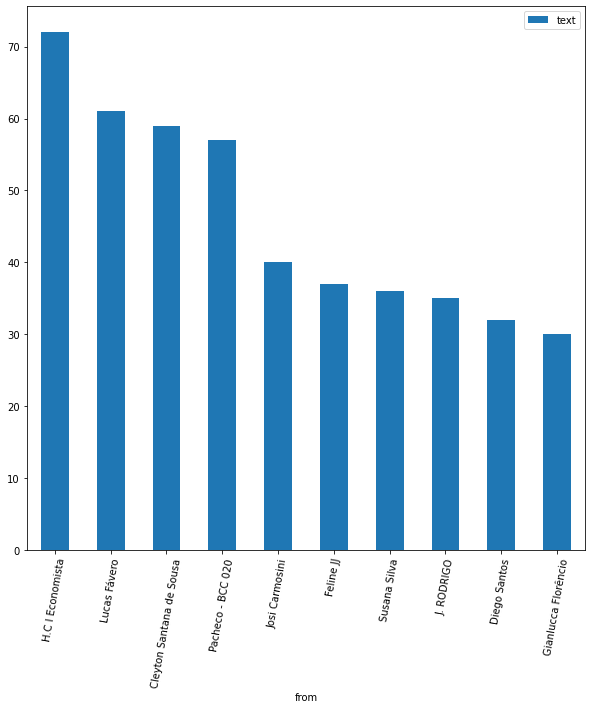

In [8]:
# Usando o método plot.bar() do Pandas para printar um gráfico de barras do novo Dataframe que foi criado anteriormente
df_top10_text.plot.bar(x= "from", y="text", rot=80, figsize=(10, 10))

# Utilizando a biblioteca WordCloud para construir uma nuvem de palavras

O primeiro passo é coletar todas as mensagens e colocar em uma única variavel. E a partir dessa única variavél contento todas as palavras das mensagens, vamos utilizar a biblioteca WordCloud para imprimir as palavras com maior frequência. 

In [12]:
# Agrupando todas as mensagens do Dataframe na coluna "text" em uma única variavél.
text = " ".join(text for text in df.text)

# Printando o total de palavras e as mensagens 
print (f"O texto contém {len(text)} palavras.")
text

O texto contém 86180 palavras.


Segundo passo é utilizar as 86.180 palavras para construir um modelo de nuvem de palavras. Para isso utilizamos a classe WordCloud, ela constrói um objeto que conta a frêquencia das palavras, e as palavras mais frequentes são distribuídas em um gráfico. 

Um conceito interessante que é usado na construção desse modelo é "stopwords", stopwords são palavras que não agregam valor significativo para geração de insights. Exemplos de stopwords: artigos (o, a, e, um, uma, etc) e preposicões (de, para, pode, se, etc). Então o modelo remove essas palavras.  

In [13]:
# Utilizando a biblioteca WordCloud para construir o modelo que faz a contagem da frequência das palavras mais utilizadas
stopwords = nltk.corpus.stopwords.words('portuguese')
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1800, height=900).generate(text)

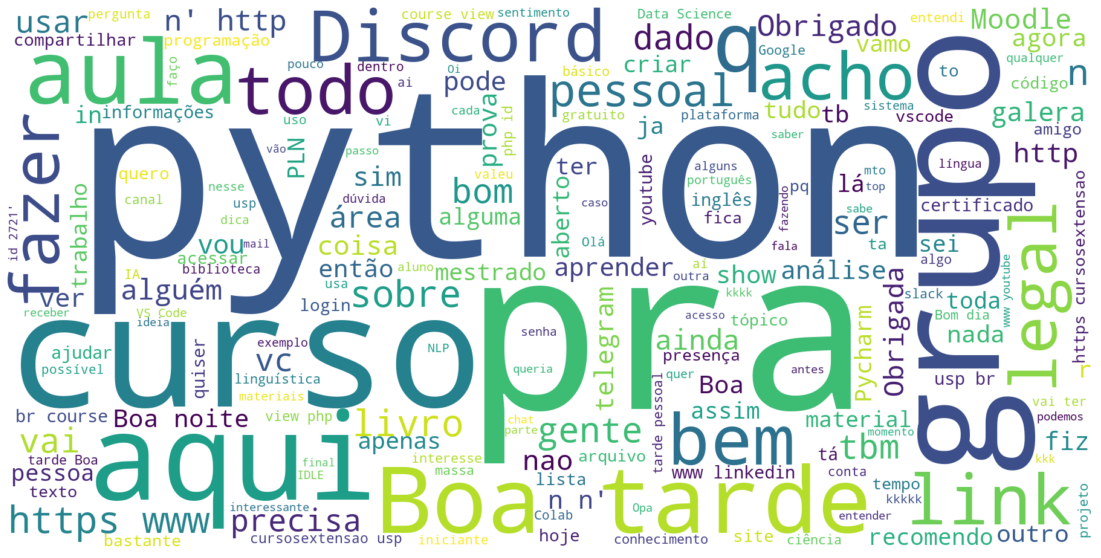

In [14]:
# Utilizando a biblioteca matplotlib para printar a imagem construída pela WordCloud
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ainda existem alguns termos como: "http, www, ja, tá" que não nos explicam muita coisa e também podem ser removidos, o próximo passo vai ser limpar ainda mais esse modelo. Adicionando esses termos na lista de stopwords.